# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [4]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [7]:
# frequency table for prestige and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   95   93   55
1          33   53   28   12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [52]:
dfnew = pd.get_dummies(df, columns=['prestige'], drop_first=False ) #keeping prestige_1.0 for usage in OR hand-calc

#### 2.2 When modeling our class variables, how many do we need? 



Answer: 1 fewer than the number of classes - in this case 3.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [53]:
print dfnew.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           0.0           1.0           0.0
1      1  660.0  3.67           0.0           0.0           1.0           0.0
2      1  800.0  4.00           1.0           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           0.0           1.0


In [54]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
print pd.crosstab(dfnew['admit'], dfnew['prestige_1.0'], rownames=['admit'])

prestige_1.0  0.0  1.0
admit                 
0             243   28
1              93   33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [59]:
odds_1 = ( 33. / (28.+33.) ) / (1 - 33. / (28.+33.))
print round(odds_1,2)

1.18


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [60]:
odds_not1 = ( 93. / (243.+93.) ) / (1 - 93. / (243.+93.))
print round(odds_not1,2)

0.38


#### 3.3 Calculate the odds ratio

In [61]:
odds_1 / odds_not1

3.079493087557604

#### 3.4 Write this finding in a sentenance: 

The odds of getting accepted into grad school increase by 208% if applying from a tier 1 school.

#### 3.5 Print the cross tab for prestige_4

In [75]:
print pd.crosstab(dfnew['admit'], dfnew['prestige_4.0'], rownames=['admit'])

prestige_4.0  0.0  1.0
admit                 
0             216   55
1             114   12


#### 3.6 Calculate the OR 

In [76]:
odds_4 = (12. / (55. + 12.)) / (1- 12. / (55. + 12.))
odds_not4 = (114. / (114. + 216.)) / (1- 114. / (114. + 216.))
odds_4 / odds_not4

0.4133971291866028

#### 3.7 Write this finding in a sentence

The odds of getting into grad school decrease by about 59% if applying from a tier 4 school.

## Part 4. Analysis

In [77]:
data = pd.get_dummies(df, columns=['prestige'], drop_first=True) #this time dropping prestige_1.0

We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [78]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [79]:
train_cols = data.columns[1:]
print train_cols

Index([u'gre', u'gpa', u'prestige_2.0', u'prestige_3.0', u'prestige_4.0',
       u'intercept'],
      dtype='object')


#### 4.2 Fit the model

In [80]:
logit = sm.Logit(data['admit'], data[train_cols])
admit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [81]:
admit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Feb 2017   Pseudo R-squ.:                 0.08166
Time:                        12:48:15   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [82]:
print np.exp(admit_fit.params) #odds ratios of each coefficeint

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [83]:
print admit_fit.conf_int()

                     0         1
gre           0.000074  0.004362
gpa           0.127619  1.431056
prestige_2.0 -1.301337 -0.058936
prestige_3.0 -2.014579 -0.662776
prestige_4.0 -2.371624 -0.735197
intercept    -6.116077 -1.637631


#### 4.5 Interpret the OR of Prestige_2

Answer: The odds of being accepted into grad school decrease by about 49% if a student applies from a tier 2 school.

#### 4.6 Interpret the OR of GPA

Answer: The odds of being accepted into grad school increase by about 118% with a 1-unit increase in GPA (i.e. from 2.0 to 3.0).

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [84]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [85]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [92]:
# recreate the dummy variables

# keep only what we need for making predictions
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
combosnew = pd.get_dummies(combos, columns=['prestige'], drop_first=True )
print combosnew.head()

     gre       gpa  intercept  prestige_2.0  prestige_3.0  prestige_4.0
0  220.0  2.260000        1.0           0.0           0.0           0.0
1  220.0  2.260000        1.0           1.0           0.0           0.0
2  220.0  2.260000        1.0           0.0           1.0           0.0
3  220.0  2.260000        1.0           0.0           0.0           1.0
4  220.0  2.453333        1.0           0.0           0.0           0.0


#### 5.2 Make predictions on the enumerated dataset

In [98]:
combosnew['admit_pred'] = result.predict(combosnew[train_cols])
print combosnew[396:]

       gre  gpa  intercept  prestige_2.0  prestige_3.0  prestige_4.0  \
396  800.0  4.0        1.0           0.0           0.0           0.0   
397  800.0  4.0        1.0           1.0           0.0           0.0   
398  800.0  4.0        1.0           0.0           1.0           0.0   
399  800.0  4.0        1.0           0.0           0.0           1.0   

     admit_pred  
396    0.734040  
397    0.582995  
398    0.419833  
399    0.368608  


#### 5.3 Interpret findings for the last 4 observations

Students with perfect GRE and GPA are 73% likely to get into grad school if from a tier 1 school.
Students with perfect GRE and GPA are 58% likely to get into grad school if from a tier 2 school.
Students with perfect GRE and GPA are 42% likely to get into grad school if from a tier 3 school.
Students with perfect GRE and GPA are 37% likely to get into grad school if from a tier 4 school.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

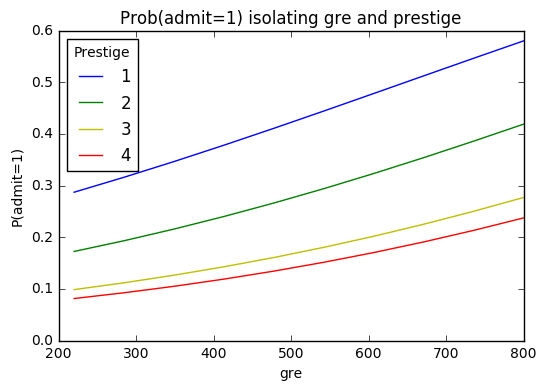

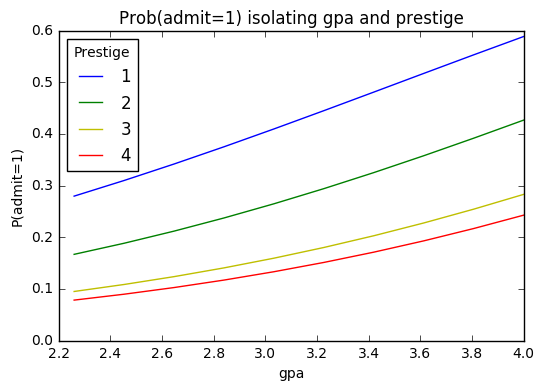

In [102]:
plot_combos = combosnew.join(combos['prestige'])

#I got this part from the yhat blog. Looked at it for guidance, would never be able to do this on my own.
def isolate_and_plot(variable):
      # isolate gre and class rank
      grouped = pd.pivot_table(plot_combos, values=['admit_pred'], index=[variable, 'prestige'],
                  aggfunc=np.mean)
      # make a plot
      colors = 'rbgyrbgy'
      for col in plot_combos.prestige.unique():
          plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
          pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])

      pl.xlabel(variable)
      pl.ylabel("P(admit=1)")
      pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
      pl.title("Prob(admit=1) isolating " + variable + " and prestige")
      pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')